### MF772 HW2
### Sike Yang

In [13]:
#1a
Entity = ["Brazil","Turkey","Russia","Chile"]
Weight = [0.25,0.25,0.25,0.25]
Spread = [223,443,116,56]

In [14]:
import pandas as pd
df = pd.DataFrame({"Entity": Entity, "Weight":Weight, "Spread":Spread})

In [15]:
df

,Entity,Weight,Spread
0,Brazil,0.25,223
1,Turkey,0.25,443
2,Russia,0.25,116
3,Chile,0.25,56


In [18]:
import numpy as np
R = 0.4
hrate = []
sprob = []
for i in range(len(df["Spread"])):
    hrate.append(df["Spread"][i]/(1000*(1-R)))
    sprob.append(np.exp(- hrate[i] * 5))
df["hrate"] = hrate
df["sprob"] = sprob 

In [19]:
df

,Entity,Weight,Spread,hrate,sprob
0,Brazil,0.25,223,0.371667,0.155932
1,Turkey,0.25,443,0.738333,0.024930
2,Russia,0.25,116,0.193333,0.380349
3,Chile,0.25,56,0.093333,0.627089


In [44]:
#1b
premium_leg = 0
for i in range(4):
    premium_leg +=  df["Weight"][i] *df["sprob"][i] *5

In [45]:
default_leg = 0
for i in range(4):
    default_leg += df["Weight"][i] * df["sprob"][i]* df["hrate"][i]* (1-R)

In [46]:
from sympy import symbols, Eq, solve
x = symbols('x')
equation = Eq(premium_leg*x, default_leg)
SI = solve(equation, x)

In [47]:
SI

[0.0210476249069017]

The fair spread of the bespoke index is 210bps

#### 1c
The contractual spread C is 200bps and the fair spread SI is 210bps, C-S<0, so the value is negative. I would not enter this contract and this is short protection.

#### 1d
Buy Protection on Brazil and Russia:
Buy Credit Default Swaps (CDS) protection on Brazil and Russia.
This involves paying a premium to receive compensation in case of default by Brazil and Russia.
This strategy is based on the belief that there might be an increased credit risk associated with these entities.

Sell Protection on Turkey and Chile:
Sell Credit Default Swaps (CDS) protection on Turkey and Chile.
This means you receive a premium for providing protection against default by Turkey and Chile.
This strategy implies confidence in the creditworthiness of Turkey and Chile.

Create a Bespoke Index:
Combine the single-names (Brazil, Turkey, Russia, Chile) and allocate weights based on their 5-year Par Spreads.

In [20]:
#2a
hyg = pd.read_csv("/Users/estelle/Desktop/MF772/HYG.csv")
jnk = pd.read_csv("/Users/estelle/Desktop/MF772/JNK.csv")
lqd = pd.read_csv("/Users/estelle/Desktop/MF772/LQD.csv")

In [28]:
data = {"Date": hyg["Date"], "HYG": hyg["Adj Close"], "JNK":jnk["Adj Close"], "LQD":lqd["Adj Close"]}
data = pd.DataFrame(data)

In [30]:
data.set_index("Date",inplace=True)
data

,HYG,JNK,LQD
Date,,,
2018-10-05,66.336151,81.181076,96.630058
2018-10-08,66.188347,80.998375,96.527390
2018-10-09,66.289482,81.089722,96.801186
2018-10-10,65.815109,80.450348,96.535950
2018-10-11,65.869492,80.655823,96.938095
...,...,...,...
2023-09-28,73.444427,89.948662,101.840134
2023-09-29,73.335007,89.889000,101.620995
2023-10-02,72.889999,89.339996,100.690002


In [59]:
#2b
window_size = 252
returns = np.log(1+data.pct_change()).dropna()
anl_vol = returns.rolling(window=window_size, min_periods=1).std()* np.sqrt(252)
anl_vol = anl_vol.dropna()

In [60]:
anl_vol

,HYG,JNK,LQD
Date,,,
2018-10-09,0.042177,0.037943,0.043727
2018-10-10,0.069339,0.072536,0.045409
2018-10-11,0.062905,0.073882,0.051382
2018-10-12,0.074048,0.079755,0.044715
2018-10-15,0.066270,0.072474,0.043216
...,...,...,...
2023-09-28,0.096405,0.096610,0.104762
2023-09-29,0.094840,0.095376,0.102898
2023-10-02,0.094554,0.095229,0.103040


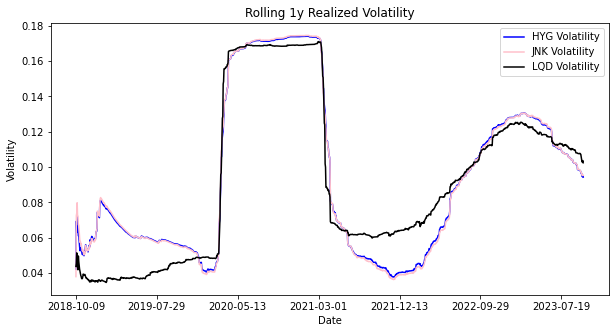

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(anl_vol.index, anl_vol["HYG"], label='HYG Volatility', color='blue')
plt.plot(anl_vol.index, anl_vol["JNK"], label='JNK Volatility', color='pink')
plt.plot(anl_vol.index, anl_vol["LQD"], label='LQD Volatility', color='black')
plt.title('Rolling 1y Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(anl_vol.index[::200])  
plt.legend()
plt.show()

Basically three ETFS have the similar pattern. LQD has a smaller change in volatility and has a lower volatility in return from 2018 to 2020 but shows more volatility from 2021.HYG and JNK have a more similar volatility distribution.

In [62]:
#2c
#estimate the carry
returns

,HYG,JNK,LQD
Date,,,
2018-10-08,-0.002231,-0.002253,-0.001063
2018-10-09,0.001527,0.001127,0.002832
2018-10-10,-0.007182,-0.007916,-0.002744
2018-10-11,0.000826,0.002551,0.004157
2018-10-12,0.005300,0.005084,0.000176
...,...,...,...
2023-09-28,0.004752,0.004321,0.001762
2023-09-29,-0.001491,-0.000664,-0.002154
2023-10-02,-0.006087,-0.006126,-0.009204


In [63]:
rf = np.log(1+0.0475)/252
n = len(returns["HYG"])-1
carry_hyg = (returns["HYG"].mean() - rf) * n
carry_jnk = (returns["JNK"].mean() - rf) * n
carry_lqd = (returns["LQD"].mean() - rf) * n
vol = returns.std()*np.sqrt(n)

In [66]:
spy = pd.read_csv("/Users/estelle/Desktop/MF772/SPY.csv")
spy_return = np.log(1 + spy["Adj Close"].pct_change()).dropna()
carry_spy = (spy_return.mean()- rf) * n
vol_spy = spy_return.std()*np.sqrt(len(spy_return)-1)

In [68]:
sharp_hyg = carry_hyg/vol["HYG"]
sharp_jnk = carry_jnk/vol["JNK"]
sharp_lqd = carry_lqd/vol["LQD"]
sharp_spy = carry_spy/vol_spy

In [71]:
results = [["HYG",carry_hyg,vol["HYG"],sharp_hyg],["JNK",carry_jnk,vol["JNK"],sharp_jnk],
           ["LQD",carry_lqd,vol["LQD"],sharp_lqd],["SPY",carry_spy,vol_spy,sharp_spy]]
results = pd.DataFrame(results,columns=["ETF","Carry","Volatility","Sharp Ratio"])
results = results.set_index("ETF")
results

,Carry,Volatility,Sharp Ratio
ETF,,,
HYG,-0.142055,0.235568,-0.603030
JNK,-0.141928,0.235552,-0.602536
LQD,-0.192869,0.238358,-0.809156
SPY,0.240923,0.481927,0.499917


Rank the ETF by their relative carry: JNK,HYG,LQD. All of these three ETFs have negative carry while SPY has a positive carry. All of these ETFs have a lower volatility than SPY.

#### 2d
For HYG: The call option with strike price 69 has the implied volatility 49.22% which is significantly higher than the realized volatility; the call option with strike price 72.5 has the implied volatility 11.43% which is lower than the realized volatility. the put option has a higher implied volatility when the strike price increase. This high implied volatility could indicate that market participants expect significant price fluctuations in the near future. And if investors are more concerned about potential downside risk, they may be willing to pay higher premiums for put options with higher strike prices, which offer more protection in case of a significant drop in the stock price.

For JNK: The put option with strike price 89.5 and 90 have a lower implied volatility compare to the realized volatility; the call option has the implied volatility 31.54% which is higher than the realized volatility.

For LQD: The implied volatility for both put and call option increases as the strike price goes up. That might because the price of LQD is relatively stable in a range. 